### Introduction

The `Lines` object provides the following features:

1. Ability to plot a single set or multiple sets of y-values as a function of a set or multiple sets of x-values
2. Ability to style the line object in different ways, by setting different attributes such as the `colors`, `line_style`, `stroke_width` etc.
3. Ability to specify a marker at each point passed to the line. The marker can be a shape which is at the data points between which the line is interpolated and can be set through the `markers` attribute

The `Lines` object has the following attributes

 | Attribute |  Description | Default Value  |
|:-:|---|:-:|
|  `colors` | Sets the color of each line, takes as input a list of any RGB, HEX, or HTML color name  | `CATEGORY10`  |
| `opacities`  | Controls the opacity of each line, takes as input a real number between 0 and 1  | `1.0`  |
| `stroke_width`  | Real number which sets the width of all paths  | `2.0`  |
| `line_style`  | Specifies whether a line is solid, dashed, dotted or both dashed and dotted  | `'solid'`  |
| `interpolation`  | Sets the type of interpolation between two points  | `'linear'`  |
| `marker`  | Specifies the shape of the marker inserted at each data point  | `None`  |
| `marker_size`  | Controls the size of the marker, takes as input a non-negative integer  | `64`  |
|`close_path`| Controls whether to close the paths or not | `False` |
|`fill`| Specifies in which way the paths are filled. Can be set to one of `{'none', 'bottom', 'top', 'inside'}`| `None` |
|`fill_colors`| `List` that specifies the `fill` colors of each path | `[]` |                                                                         
| **Data Attribute** |  **Description** | **Default Value**  |
|`x` |abscissas of the data points | `array([])` |
|`y` |ordinates of the data points | `array([])` |
|`color` | Data according to which the `Lines` will be colored. Setting it to `None` defaults the choice of colors to the `colors` attribute | `None` |

## pyplot's plot method can be used to plot lines with meaningful defaults

In [1]:
import numpy as np
from pandas import date_range
import bqplot.pyplot as plt
from bqplot import *

In [2]:
security_1 = np.cumsum(np.random.randn(150)) + 100.
security_2 = np.cumsum(np.random.randn(150)) + 100.

## Basic Line Chart

In [3]:
fig = plt.figure(title='Security 1')
axes_options = {'x': {'label': 'Index'}, 'y': {'label': 'Price'}}
# x values default to range of values when not specified
line = plt.plot(security_1, axes_options=axes_options)
fig

Figure(axes=[Axis(label='Index', scale=LinearScale()), Axis(label='Price', orientation='vertical', scale=Linea…

**We can explore the different attributes by changing each of them for the plot above:**

In [4]:
line.colors = ['DarkOrange']

In a similar way, we can also change any attribute after the plot has been displayed to change the plot. Run each of the cells below, and try changing the attributes to explore the different features and how they affect the plot.

In [5]:
# The opacity allows us to display the Line while featuring other Marks that may be on the Figure
line.opacities = [.5]

In [6]:
line.stroke_width = 2.5

To switch to an area chart, set the `fill` attribute, and control the look with `fill_opacities` and `fill_colors`.

In [7]:
line.fill = 'bottom'
line.fill_opacities = [0.2]

In [8]:
line.line_style = 'dashed'

In [9]:
line.interpolation = 'basis'

While a `Lines` plot allows the user to extract the general shape of the data being plotted, there may be a need to visualize discrete data points along with this shape. This is where the `markers` attribute comes in.

In [10]:
line.marker = 'triangle-down'

The `marker` attributes accepts the values `square`, `circle`, `cross`, `diamond`, `square`, `triangle-down`, `triangle-up`, `arrow`, `rectangle`, `ellipse`. Try changing the string above and re-running the cell to see how each `marker` type looks.

## Plotting a Time-Series

The `DateScale` allows us to plot time series as a `Lines` plot conveniently with most `date` formats.

In [11]:
# Here we define the dates we would like to use
dates = date_range(start='01-01-2007', periods=150)

In [12]:
fig = plt.figure(title='Time Series')
axes_options = {'x': {'label': 'Date'}, 'y': {'label': 'Security 1'}}
time_series = plt.plot(dates, security_1, 
                       axes_options=axes_options)
fig

Figure(axes=[Axis(label='Date', scale=DateScale()), Axis(label='Security 1', orientation='vertical', scale=Lin…

## Plotting multiples sets of data

The `Lines` mark allows the user to plot multiple `y`-values for a single `x`-value. This can be done by passing an `ndarray` or a list of the different `y`-values as the y-attribute of the `Lines` as shown below.

In [13]:
dates_new = date_range(start='06-01-2007', periods=150)

We pass each data set as an element of a `list`

In [14]:
fig = plt.figure()
axes_options = {'x': {'label': 'Date'}, 'y': {'label': 'Price'}}
line = plt.plot(dates, [security_1, security_2], 
                labels=['Security 1', 'Security 2'],
                axes_options=axes_options,
                display_legend=True)
fig

Figure(axes=[Axis(label='Date', scale=DateScale()), Axis(label='Price', orientation='vertical', scale=LinearSc…

Similarly, we can also pass multiple `x`-values for multiple sets of `y`-values

In [15]:
line.x, line.y = [dates, dates_new], [security_1, security_2]

### Coloring Lines according to data

The `color` attribute of a `Lines` mark can also be used to encode one more dimension of data. Suppose we have a portfolio of securities and we would like to color them based on whether we have bought or sold them. We can use the `color` attribute to encode this information.

In [16]:
fig = plt.figure()
axes_options = {'x': {'label': 'Date'}, 
                'y': {'label': 'Security 1'},
                'color' : {'visible': False}}
# add a custom color scale to color the lines
plt.scales(scales={'color': ColorScale(colors=['Red', 'Green'])})

In [17]:
dates_color = date_range(start='06-01-2007', periods=150)

In [18]:
securities = 100. + np.cumsum(np.random.randn(150, 10), axis=0)
# we generate 10 random price series and 10 random positions
positions = np.random.randint(0, 2, size=10)

In [19]:
# We pass the color scale and the color data to the plot method
line = plt.plot(dates_color, securities.T, color=positions, 
                axes_options=axes_options)
fig

Figure(axes=[ColorAxis(scale=ColorScale(colors=['Red', 'Green']), visible=False), Axis(label='Date', scale=Dat…

We can also reset the colors of the Line to their defaults by setting the `color` attribute to `None`.

In [20]:
line.color = None

## Patches

The `fill` attribute of the `Lines` mark allows us to fill a path in different ways, while the `fill_colors` attribute lets us control the color of the `fill`

In [41]:
import bqplot
def_tt = bqplot.Tooltip(fields=['name'], formats=[''])

In [42]:
fig = plt.figure(animation_duration=1000)
patch = plt.plot([],[],
                 fill_colors=['orange', 'blue', 'red'],
                 fill='inside',
                 axes_options={'x': {'visible': False}, 'y': {'visible': False}},
                 stroke_width=2,
                 close_path=True,
                 display_legend=True, tooltip=def_tt,)

patch.x = [[4,   5,   6,   6,   5,   4,   3,  1], [1, 2, 3]], 
patch.y = [[1, 1.1, 1.2, 2.3, 2.2, 2.7, 1.0, -2], [3, 2, 3]]
fig

Figure(animation_duration=1000, axes=[Axis(scale=LinearScale(), visible=False), Axis(orientation='vertical', s…

In [35]:
patch.opacities = [0.9, 0.9]

In [36]:
patch.x = [[10, 3, 3.2], [0.5, 2.5, 1.7], [4,5,6, 6, 5, 4, 3]]

In [24]:
patch.close_path = True

# Voronoi Plot

In [59]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [68]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

In [61]:
vor = Voronoi(points)

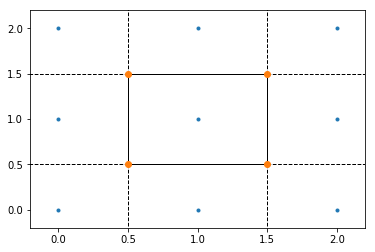

In [69]:
import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()

### Points
Coordinates of input points

In [70]:
vor.points

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.]])

### Vertices
Cooridnates of the Voronoi vertices

In [71]:
vor.vertices

array([[0.5, 0.5],
       [1.5, 0.5],
       [0.5, 1.5],
       [1.5, 1.5]])

### Ridge Points
Indices of the points between which each Voronoi ridge lies.

In [72]:
vor.ridge_points

array([[0, 1],
       [0, 3],
       [6, 3],
       [6, 7],
       [3, 4],
       [5, 8],
       [5, 2],
       [5, 4],
       [8, 7],
       [2, 1],
       [4, 1],
       [4, 7]], dtype=int32)

In [75]:
len(vor.ridge_points)

12

### Ridge Vertices
Indices of the Voronoi vertices forming each Voronoi ridge

In [73]:
vor.ridge_vertices

[[-1, 0],
 [-1, 0],
 [-1, 1],
 [-1, 1],
 [0, 1],
 [-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 3],
 [-1, 2],
 [0, 2],
 [1, 3]]

In [74]:
len(vor.ridge_vertices)

12

### Regions
Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside of the Voronoi diagram

In [76]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [3, 2, 0, 1],
 [2, -1, 0],
 [3, -1, 1]]

It looks like there is only one Voronoi region with all vertices defined in the region of the Voronoi diagram. `[3, 2, 0, 1]`. This probably corresponds to the square.

### Point Regoin
Index of the Voronoi region for each input point. If qhull option "Qc" was not specificd, the list will contain -1 for points that are not associated with a Voronoi region. 

In [77]:
vor.point_region

array([1, 8, 6, 3, 7, 4, 2, 9, 5])

# More complicated Voronoi Example

In [187]:
import matplotlib.pyplot as plt
np.random.seed(seed=100)
points = np.random.rand(100,2) #random

In [201]:
points[0]

array([0.54340494, 0.27836939])

In [188]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

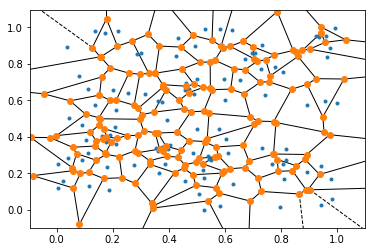

In [189]:
fig = voronoi_plot_2d(vor)

[0.90251145 0.11016257] [3.72547275 0.22706467]
[ 0.01032168 -1.04464508] [0.34157344 0.01009209]
[0.34157344 0.01009209] [0.54073138 0.04956867]
[ 0.67963632 -0.35814311] [0.54073138 0.04956867]
[0.08479323 0.20046933] [0.05995157 0.1194804 ]
[0.08479323 0.20046933] [0.05996367 0.21527102]
[0.05996367 0.21527102] [-0.08475255  0.18766431]
[0.05995157 0.1194804 ] [-0.08475255  0.18766431]
[-1.77894737  0.65828383] [-0.09305335  0.3972502 ]
[0.05614454 0.23058335] [-0.09305335  0.3972502 ]
[0.05614454 0.23058335] [0.05996367 0.21527102]
[ 0.01032168 -1.04464508] [ 0.08085442 -0.07901056]
[ 0.08085442 -0.07901056] [0.05995157 0.1194804 ]
[1.02397719 0.71654583] [0.92487381 0.71846027]
[1.02397719 0.71654583] [0.94849749 0.50947049]
[0.94849749 0.50947049] [0.89226158 0.68685185]
[0.92487381 0.71846027] [0.89226158 0.68685185]
[0.55372356 0.92859276] [0.5860767  0.89670306]
[0.55372356 0.92859276] [0.74363861 9.08051565]
[0.5860767  0.89670306] [0.78261233 1.89223011]
[0.74363861 9.080515

[0.36662579 0.33319191] [0.37894569 0.32452629]
[0.36145621 0.42101752] [0.38914221 0.34906461]
[0.33115473 0.26959723] [0.39159601 0.29316961]
[0.47032906 0.37975397] [0.44216206 0.3268257 ]
[0.456681   0.24686423] [0.4315829  0.28946008]
[0.29048863 0.55598494] [0.38019116 0.67440959]
[0.29048863 0.55598494] [0.27588459 0.57282621]
[0.27588459 0.57282621] [0.29630563 0.74282076]
[0.37829189 0.68538514] [0.38019116 0.67440959]
[0.37829189 0.68538514] [0.35181931 0.74825266]
[0.35181931 0.74825266] [0.32849764 0.74682647]
[0.32849764 0.74682647] [0.29630563 0.74282076]
[0.390337  0.6579497] [0.38019116 0.67440959]
[0.3031272  0.52111162] [0.29048863 0.55598494]
[0.46057307 0.67737732] [0.37829189 0.68538514]
[0.35206171 0.74849571] [0.35181931 0.74825266]
[0.26952483 0.92428224] [0.32849764 0.74682647]
[0.18993023 0.59982689] [0.15260836 0.62850493]
[0.18993023 0.59982689] [0.21267927 0.6018216 ]
[0.21267927 0.6018216 ] [0.2574911  0.74863267]
[0.15260836 0.62850493] [0.16016613 0.7277

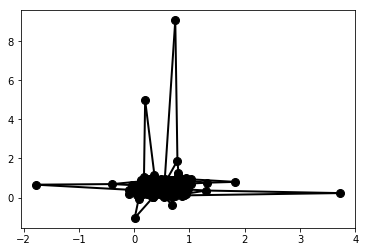

In [190]:
fig = plt.figure()

# Mark the Voronoi vertices.
plt.plot(vor.vertices[:,0], vor.vertices[:, 1], 'ko', ms=8)

for vpair in vor.ridge_vertices:
    if vpair[0] >= 0 and vpair[1] >= 0:
        v0 = vor.vertices[vpair[0]]
        v1 = vor.vertices[vpair[1]]
        
        print(v0, v1)
        # Draw a line from v0 to v1.
        plt.plot([v0[0], v1[0]], [v0[1], v1[1]], 'k', linewidth=2)

plt.show()

In [191]:
vor.regions

[[1, -1, 0],
 [17, 5, 2, -1, 16],
 [23, 21, 20, 22],
 [23, -1, 6, 19, 18, 21],
 [23, -1, 2, 4, 22],
 [27, 25, 24, 26],
 [34, 32, 31, 33],
 [40, 39, 38, -1],
 [38, 15, 7, 6, -1],
 [],
 [39, 13, 14, 15, 38],
 [40, 36, 37, 31, 33, -1],
 [42, 25, 24, 10, 9, -1, 1, 3, 41],
 [44, 0, 1, 3, 43],
 [46, 44, 0, -1, 45],
 [49, 16, 17, 47],
 [50, 45, -1, 16, 49],
 [53, 4, 22, 20, 52],
 [59, 29, 27, 26, 11, 58],
 [61, 34, 33, -1, 9, 8, 60],
 [68, 36, 37, 35, 65],
 [66, 57, 28, 35, 65],
 [68, 36, 40, 39, 13, 67],
 [70, 43, 3, 41, 69],
 [75, 55, 54, 51, 73, 72, 74],
 [77, 55, 54, 53, 52, 76],
 [78, 18, 21, 20, 52, 76],
 [79, 56, 19, 18, 78],
 [84, 79, 78, 76, 77, 83],
 [86, 58, 11, 63, 64, 85],
 [90, 87, 86, 58, 59, 89],
 [94, 92, 91, 93],
 [93, 10, 9, 8, 91],
 [92, 60, 8, 91],
 [94, 63, 64, 62, 61, 60, 92],
 [94, 63, 11, 26, 24, 10, 93],
 [98, 96, 95, 97],
 [97, 46, 45, 50, 48, 95],
 [98, 70, 43, 44, 46, 97],
 [110, 106, 103, 104, 105, 108, 107, 109],
 [106, 102, 101, 99, 71, 103],
 [104, 96, 95, 48,

### Assemble lists of vertex positions for bqplot

In [192]:
patch_data = {}
patch_data['x'] = []
patch_data['y'] = []
for inst_region in vor.regions:
    if -1 not in inst_region and len(inst_region) > 0:
        
        print(inst_region)
        
        x_list = []
        y_list = []
        for inst_vertex in inst_region:
            inst_pos = vor.vertices[inst_vertex]
            x_list.append(inst_pos[0])
            y_list.append(inst_pos[1])
            
        patch_data['x'].append(x_list)
        patch_data['y'].append(y_list)    

[23, 21, 20, 22]
[27, 25, 24, 26]
[34, 32, 31, 33]
[39, 13, 14, 15, 38]
[44, 0, 1, 3, 43]
[49, 16, 17, 47]
[53, 4, 22, 20, 52]
[59, 29, 27, 26, 11, 58]
[68, 36, 37, 35, 65]
[66, 57, 28, 35, 65]
[68, 36, 40, 39, 13, 67]
[70, 43, 3, 41, 69]
[75, 55, 54, 51, 73, 72, 74]
[77, 55, 54, 53, 52, 76]
[78, 18, 21, 20, 52, 76]
[79, 56, 19, 18, 78]
[84, 79, 78, 76, 77, 83]
[86, 58, 11, 63, 64, 85]
[90, 87, 86, 58, 59, 89]
[94, 92, 91, 93]
[93, 10, 9, 8, 91]
[92, 60, 8, 91]
[94, 63, 64, 62, 61, 60, 92]
[94, 63, 11, 26, 24, 10, 93]
[98, 96, 95, 97]
[97, 46, 45, 50, 48, 95]
[98, 70, 43, 44, 46, 97]
[110, 106, 103, 104, 105, 108, 107, 109]
[106, 102, 101, 99, 71, 103]
[104, 96, 95, 48, 71, 103]
[105, 69, 70, 98, 96, 104]
[108, 42, 41, 69, 105]
[109, 30, 88, 89, 59, 29, 107]
[108, 42, 25, 27, 29, 107]
[112, 102, 101, 100, 111]
[115, 51, 73, 113]
[115, 51, 54, 53, 4, 2, 5, 114]
[118, 116, 80, 7, 6, 19, 56, 117]
[122, 83, 77, 55, 75, 82, 81, 121]
[128, 110, 109, 30, 125]
[129, 112, 102, 106, 110, 128]
[1

In [199]:
import bqplot.pyplot as plt
fig = plt.figure(animation_duration=1000)
patch = plt.plot([],[],
                 fill_colors=['orange', 'blue', 'red'],
                 fill='inside',
                 axes_options={'x': {'visible': False}, 'y': {'visible': False}},
                 stroke_width=1,
                 close_path=True,
                 tooltip=def_tt,)

# patch.x = [[4,   5,   6,   6,   5,   4,   3,  1], [1, 2, 3]], 
# patch.y = [[1, 1.1, 1.2, 2.3, 2.2, 2.7, 1.0, -2], [3, 2, 3]]

patch.x = patch_data['x']
patch.y = patch_data['y']

fig

Figure(animation_duration=1000, axes=[Axis(scale=LinearScale(), visible=False), Axis(orientation='vertical', s…

In [194]:
len(patch_data['x'])

89